In [10]:
import numpy as np
import matplotlib.pyplot as plt
#import tensorflow as tf
from np_fun import prob, prob_part
#from tf_fun import init as tf_init

from matplotlib import cm

In [11]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
#### def prob(*x,phi=0.1,alp = 0.125):
#%timeit prob_part(0,0,0,0,1)    


In [6]:
def func(x):
    return prob_part(0,0,0,0,phi=x)

In [106]:
start = 0.0
stop = 1.0
number_of_lines= 3
cm_subsection = np.linspace(start, stop, number_of_lines) 
plt.rcParams['axes.linewidth'] = 2.2
#set the value globally

colors = [ cm.cool(x) for x in cm_subsection ]
x = np.linspace(0,6,100)
y = np.array(list(map(lambda x: abs(np.power(func(x),2)),x)))
f, ax = plt.subplots(1,1,figsize=(8,6))
labels = [r"$| %i \rangle$"%i for i in range(3)]
for i,color,label in zip(y.T,colors,labels):
    ax.plot(x,i,color=color,linewidth=1.7,label=label)
plt.legend()

fontsize =16
plt.xlabel(' φ ',fontsize=fontsize)
plt.ylabel(' Intensity ', fontsize=fontsize)

ax.tick_params(axis="y",direction="in",labelsize=13,width=2,length=8)
ax.tick_params(axis="x",direction="in",labelsize=13,width=2,length=8)
plt.savefig('theoretical_plot.pdf')
plt.close()

print(np.min(y))


7.856183934644086e-05


Data points used: 35


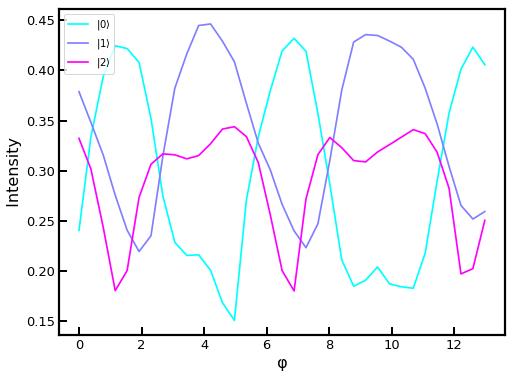

In [114]:
 
from numpy import genfromtxt
filenames = [
    './data_05-07-2018_20-20_port0.csv',
    './data_05-07-2018_20-30_port1.csv',
    './data_05-07-2018_20-20_port2.csv'
]
exp_points = [genfromtxt(i, delimiter=',') for i in filenames]
times = exp_points[0].T[1]
exp_points = np.array([i.T[0] for i in exp_points])

me_min, ampl, per = 0, max(np.sum(exp_points,axis=0)), 120
start_exp, end_exp = 10, 45
data = exp_points[:, start_exp:end_exp]
pts = times[start_exp:end_exp]-times[start_exp]

data = data - me_min
data /= ampl 
pts = pts/120*2*np.pi

colors = [ cm.cool(x) for x in cm_subsection ]
x = np.linspace(0,6,100)
y = np.array(list(map(lambda x: abs(np.power(func(x),2)),x)))
f, ax = plt.subplots(1,1,figsize=(8,6))
labels = [r"$| %i \rangle$"%i for i in range(3)]
for i,color,label in zip(data,colors,labels):
    ax.plot(pts,i,color=color,linewidth=1.7,label=label)
plt.legend()

fontsize =16
plt.xlabel(' φ ',fontsize=fontsize)
plt.ylabel(' Intensity ', fontsize=fontsize)

ax.tick_params(axis="y",direction="in",labelsize=13,width=2,length=8)
ax.tick_params(axis="x",direction="in",labelsize=13,width=2,length=8)
plt.savefig('experimental_plot.pdf')


l = len(pts)
print('Data points used:',l)

In [97]:
st = lambda x,y,z: (x-4)**2+1+y*x+np.sin(z)
f = lambda a,b: lambda x: tst(x,a,b)
x_points = np.linspace(0,2,25)
vals = np.array(list(map(f(3.1,2.1),x_points)))

v = tf.Variable(vals)
params = tf.Variable(np.ones(2))


vc = np.array([tst(i,params[0],params[1]) for i in x_points])
d = [v - i for i in vc]
loss = tf.reduce_mean(tf.square(d))

opt = tf.train.AdamOptimizer(learning_rate=0.09)
opt_op = opt.minimize(loss, var_list=[params])
grads_and_vars = opt.compute_gradients(loss, var_list=[params])

xrt = [0,0]
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(100):
        ret = sess.run(opt_op)
        xrt,lrt,g_v = sess.run([params,loss,grads_and_vars])
        print(i,ret,xrt,lrt,g_v)
    
        
v_r = list(map(f(*xrt),x_points))
print(len(v_r),len(x_points))
plt.figure(figsize=(10,10))
plt.plot(x_points,list(v_r))
plt.plot(x_points,vals)
    

NameError: name 'tst' is not defined

In [102]:
expi = lambda x: tf.exp(tf.complex(0.,x))
real = lambda x: tf.complex(x,0.)
tf.reset_default_graph()

t = real(tf.sqrt(0.2))
r = real(tf.sqrt(1.-0.2))

pi = np.pi
def a12(al= np.pi, thet=0):
    return expi(thet)*\
    tf.Variable(
        [
        [ expi(-thet), 0, 0],
        [0, t, r*expi(al)  ],
        [0, -r*expi(-al), t]
        ]
    )

vals = [0.125,0,pi,0,pi,pi,pi,0,0,0,0,0]
vals = [tf.constant(float(x),dtype=tf.float32) for x in vals]
a1,al1,al2,al3,al4,ala,alb,th1,th2,th3,th4,thb = vals
f = a12(al4,th4)
fun = None
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    fun = sess.run(f)
    print(fun)

NameError: name 'tf' is not defined

In [99]:
T=0.6
t = np.sqrt(T)
r = np.sqrt(1.-T)
def a12(al=np.pi, thet=0):
    return np.exp(1j*thet)*\
    np.array(
    [
    [np.exp(-1j*thet), 0, 0],
    [0, t, r*np.exp(1j*al)],
    [0, -r*np.exp(-1j*al), t]
    ]
    )

def a01(al=np.pi, thet=0):
    return np.exp(1j*thet)*\
    np.array(
    [
        [t, r*np.exp(1j*al), 0],
        [-r*np.exp(-1j*al), t, 0],
        [0, 0, np.exp(-1j*thet)]
    ]
    )

print(a01(1.2,2))
print(np.array(fun))


[[-0.32234595+0.70433876j -0.63137705-0.03691905j -0.        +0.j        ]
 [-0.44063601-0.45369583j -0.32234595+0.70433876j -0.        +0.j        ]
 [-0.        +0.j         -0.        +0.j          1.        +0.j        ]]


NameError: name 'fun' is not defined

In [100]:
tf.reset_default_graph()

tf_prob = tf_init()
def func(x):
    return tf_prob(0,0,0,0,phi=x)
pts = np.linspace(0,6,20)
y = np.array(list(map(lambda x: abs(np.power(func(x),2)),x)))
vals =tf.Variable([func(tf.Variable(x,dtype=tf.float32)) for x in pts])
#mods = tf.map_fn(tf.abs(tf.square,vals))


foo = None
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    fun = sess.run(vals)
    foo = fun
    print(fun.shape)

NameError: name 'tf' is not defined

In [101]:
tf_vars = np.array(foo)
print(tf_vars.shape)
tf_vars = tf_vars.reshape(20,3)
pts = np.linspace(0,6,20)
y = np.array([abs(np.power(x,2)) for x in tf_vars])
%matplotlib inline
for i in y.T:
    plt.plot(pts,i)

NameError: name 'foo' is not defined

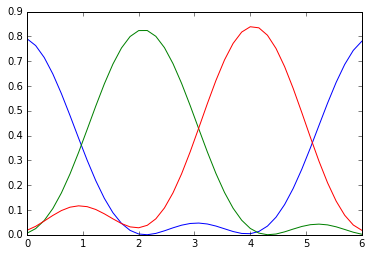

In [43]:

def func(x):
    return prob_part(0,0,0,0,phi=x)
x = np.linspace(0,6,40)
y = np.array(list(map(lambda x: abs(np.power(func(x),2)),x)))
for i in y.T:
    plt.plot(x,i)

In [36]:
y_tf = np.array([abs(np.power(x,2)) for x in tf_vars])
print(y[0],y_tf[0])
print(y[0] - y_tf[0])

[0.61069894 0.14746056 0.23920183] [0.59651417 0.31223613 0.08683799]
[ 0.01418477 -0.16477557  0.15236384]


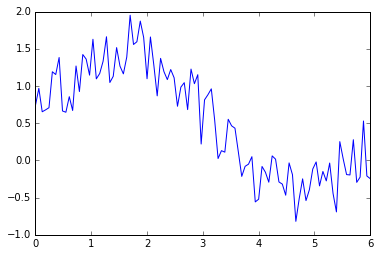

In [20]:
x = np.linspace(0,6,100)
data = np.sin(x)+np.random.rand(100)
plt.plot(x,data)



In [15]:
fun = lambda x,y: tf.sin(x*y)
N = 100
vals= tf.placeholder(shape=(N),dtype=tf.float32)
pts= tf.placeholder(shape=(N),dtype=tf.float32)
w = tf.Variable(0.4)
loss = tf.reduce_sum(tf.square(vals-fun(w,pts)))
opt = tf.train.GradientDescentOptimizer(learning_rate=0.04)
step= opt.minimize(loss,var_list=[w])

with tf.Session() as sess:
    print(loss_r)
    sess.run(tf.global_variables_initializer())
    for i in range(10):
        _,loss_r,w_r = sess.run([step,loss,w],feed_dict={vals:data,pts:x})
        print('loss:%f, w:%f'%(loss_r,w_r))


136.46384
loss:90.294121, w:0.400000
loss:132.499954, w:8.231040
loss:130.661438, w:7.537200
loss:133.707413, w:8.358198
loss:132.743118, w:8.245891
loss:128.822830, w:7.629921
loss:133.763535, w:8.408216
loss:133.757324, w:8.419720
loss:133.715454, w:8.451012
loss:133.514297, w:8.524213


In [10]:
import time
def a(tim):
    i=0
    while i<tim:
        i+=1
        time.sleep(0.5)
        print('d')
        if (np.random.rand()<0.5):
            yield [1]*i
        else:
            next()
    

In [11]:
for i in a(10):
    print(i)

d
[1]
d
[1, 1]
d


TypeError: next expected at least 1 arguments, got 0